# MODELLING OVERVIEW : Investment Type Recommender System

## Objectives

- **Analysis-Based**  
  Understand investment behaviors among Kenyan users and segment them based on patterns.


- **Modeling-Based**  
  Build and evaluate recommender models, including:
  - Content-based filtering
  - Hybrid approaches (clustering + classification)




In [101]:

# import libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [102]:
# load data

file_path = "C:/Users/hp/Documents/Group4_Capstone_Final_Project/final_refined.csv"

invest_df = pd.read_csv(file_path)
invest_df.head()

,householdid,county,area_type,gender,age_of_respondent,no_of_household_mebers,livelihoodcat,Quintiles,Education,Marital,...,insurance_including_NHIF_use,All_Insurance_excluding_NHIF_use,PWD,Latitude,Longitude,has_account,has_savings,has_credit,has_mobile,receives_remittance
0,107141431,garissa,urban,male,29,5,dependent,fourth,tertiary,married/living with partner,...,never used,never used,without disability,-0.435423,39.636586,0,0,0,0,0
1,10712933,garissa,urban,male,60,11,other,second,primary,married/living with partner,...,never used,never used,without disability,0.058794,40.305006,0,0,0,0,0
2,140173183,busia,urban,female,35,2,casual worker,fourth,primary,divorced/separated,...,never used,never used,without disability,0.636836,34.277390,0,0,0,0,0
3,122137153,kiambu,urban,male,24,1,casual worker,middle,secondary,single/never married,...,never used,never used,without disability,-1.251917,36.719076,0,0,0,0,0
4,121193116,murang'a,urban,female,20,1,dependent,highest,secondary,single/never married,...,never used,never used,without disability,-0.795820,37.131085,0,0,0,0,0


 # **Investment Modelling pipeline**
 Emulating a object oriented approach with our **class** `InvestmentPipeline`.We are defining the structure of our pipeline before calling 



In [103]:
class InvestmentPipeline:
    def __init__(self):
        # Initialize models, scalers, configs, etc.
        pass

    def preprocess_data(self, df):
        """
        General preprocessing: handle missing values, encode, scale, etc.
        """
        pass

    def prepare_transactions(self, df):
        """
        Converts binary features (0/1) into boolean format for association rule mining.
        Assumes input features are already numeric and binary.
        """
        df_bool = df.copy()

        # Identify binary columns (only 0 and 1 values)
        binary_cols = [col for col in df_bool.columns if set(df_bool[col].dropna().unique()) <= {0, 1}]
        df_bool = df_bool[binary_cols]

        # Convert to boolean
        df_bool = df_bool.astype(bool)

        return df_bool

    def mine_association_rules(self, df_bool, min_support=0.1, min_confidence=0.5):
        """
        Mine frequent itemsets and extract association rules.
        """
        pass

    def cluster_investors(self, df, n_clusters=3):
        """
        Apply clustering (e.g., K-Means) to segment investors.
        """
        pass

    def recommend_investments(self, investor_profile):
        """
        Recommend investments based on rules or cluster profiles.
        """
        pass

    def explain_model(self, model, X):
        """
        Use SHAP or PCA to visualize and interpret model decisions.
        """
        pass

## **Feature Separation**
###  Preprocesses the dataset:
        - Imputes and scales numeric features
        - Imputes and encodes categorical features
        - Returns a transformed DataFrame

In [104]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SKPipeline

class InvestmentPipeline:
    def __init__(self):
        # Define preprocessing for numeric and categorical features
        self.numeric_transformer = SKPipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])

        self.categorical_transformer = SKPipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ])

        self.preprocessor = None  # Will be set after fitting

    def preprocess_data(self, invest_df):
        
        invest_df_clean = invest_df.copy()

        # Step 1: Identify column types
        numeric_cols = invest_df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = invest_df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

        # Step 2: Create column transformer
        self.preprocessor = ColumnTransformer(transformers=[
            ('num', self.numeric_transformer, numeric_cols),
            ('cat', self.categorical_transformer, categorical_cols)
        ])

        # Step 3: Fit and transform
        invest_df_transformed = self.preprocessor.fit_transform(invest_df_clean)

        # Step 4: Get feature names
        num_features = numeric_cols
        cat_features = self.preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)
        all_features = list(num_features) + list(cat_features)

        # Step 5: Return as DataFrame
        return pd.DataFrame(invest_df_transformed, columns=all_features)

In [105]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

class InvestmentPipeline:
    def __init__(self):
        # Initialize transformers
        self.numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])

        self.categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ])

        self.preprocessor = None  # Will be defined after fitting

    def preprocess_data(self, invest_df):
        """
        Preprocess the raw investment data:
        - Impute missing values
        - Encode categorical features
        - Scale numeric features
        """
        invest_df_clean = invest_df.copy()

        # Separate numeric and categorical columns
        numeric_cols = invest_df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = invest_df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

        # Combine transformers
        self.preprocessor = ColumnTransformer(transformers=[
            ('num', self.numeric_transformer, numeric_cols),
            ('cat', self.categorical_transformer, categorical_cols)
        ])

        # Apply transformations
        invest_df_processed = self.preprocessor.fit_transform(invest_df_clean)

        # Get feature names
        num_features = numeric_cols
        cat_features = self.preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)
        all_features = list(num_features) + list(cat_features)

        # Return as DataFrame
        return pd.DataFrame(invest_df_processed, columns=all_features)

    def prepare_transactions(self, invest_df):
        """
        Converts binary features (0/1) into boolean format for association rule mining.
        Assumes input features are already numeric and binary.
        """
        invest_df_bool = invest_df.copy()

        # Identify binary columns (only 0 and 1 values)
        binary_cols = [col for col in invest_df_bool.columns if set(invest_df_bool[col].dropna().unique()) <= {0, 1}]
        invest_df_bool = invest_df_bool[binary_cols]

        # Convert to boolean
        invest_df_bool = invest_df_bool.astype(bool)

        return invest_df_bool

    def mine_association_rules(self, invest_df_bool, min_support=0.1, min_confidence=0.5):
        """
        Mine frequent itemsets and extract association rules.
        """
        pass

    def cluster_investors(self, invest_df, n_clusters=3):
        """
        Apply clustering (e.g., K-Means) to segment investors.
        """
        pass

    def recommend_investments(self, investor_profile):
        """
        Recommend investments based on rules or cluster profiles.
        """
        pass

    def explain_model(self, model, X):
        """
        Use SHAP or PCA to visualize and interpret model decisions.
        """
        pass

In [106]:
pipeline = InvestmentPipeline()

# Step 1: Preprocess your raw investment data
invest_df_scaled = pipeline.preprocess_data(invest_df)

# Step 2: Inspect the result
print(invest_df_scaled.head())

   householdid  age_of_respondent  no_of_household_mebers  CalcExpenditure  \
0    -0.245766          -0.596843                0.312049         3.293907   
1    -0.559097           1.204477                2.700016        -0.021234   
2    -0.138433          -0.248200               -0.881934         0.969329   
3    -0.197039          -0.887378               -1.279928        -0.484404   
4    -0.200107          -1.119806               -1.279928         0.222393   

   total_monthly_expenditure  no_respodent_per_hh  hhWeight  \
0                   4.096836            -0.591811 -0.308792   
1                   0.425916             1.207526 -0.914595   
2                   0.066022            -0.243553 -0.456369   
3                  -0.401840            -0.882027  2.757352   
4                  -0.509808            -1.114200 -0.348454   

   Informal_group_membership  Above16_Total  Above16  ...  \
0                  -0.160662      -0.096354      0.0  ...   
1                  -0.160662  

## **Associate Rule Mining Method to the Class**
###  In our existing pipeline, using `mlxtend` for rule extraction and `networkx` and `matplotlib` for visualizations
### install Required libraries.

In [107]:
pip install mlxtend networkx matplotlib seaborn

## Update the Pipeline with our Class **prepare_transactions()** for Rule Mining.
### Preprocessing our data into a transactional format suitable for `APriori`.Converting  binary financial features into boolean format for rule mining.

In [108]:
def prepare_transactions(self, invest_df):
  
    invest_df_bool = invest_df.copy()

    # Only keep binary columns (0/1)
    binary_cols = [col for col in invest_df_bool.columns if set(invest_df_bool[col].unique()) <= {0, 1}]
    invest_df_bool = invest_df_bool[binary_cols]

    # Convert to boolean
    invest_df_bool = invest_df_bool.astype(bool)

    return invest_df_bool

In [109]:
invest_df_bool = pipeline.prepare_transactions(invest_df_scaled)
print(invest_df_bool.head())
print(invest_df_bool.dtypes)

   Above16  has_account  has_savings  has_credit  has_mobile  \
0    False        False        False       False       False   
1    False        False        False       False       False   
2    False        False        False       False       False   
3    False        False        False       False       False   
4    False        False        False       False       False   

   receives_remittance  county_baringo  county_bomet  county_bungoma  \
0                False           False         False           False   
1                False           False         False           False   
2                False           False         False           False   
3                False           False         False           False   
4                False           False         False           False   

   county_busia  ...  using_someone_acc_no  using_someone_acc_yes  \
0         False  ...                 False                   True   
1         False  ...                 False  

## **Extract Rules with Apriori**
### Add this method to your class,Mines frequent itemsets and association rules.`mine_association rules()` to discover relationships of households in `counties` in relation to their mobile access.
    


In [110]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

class InvestmentPipeline:
    # ... your other methods ...

    def mine_association_rules(self, invest_df_bool, min_support=0.1, min_confidence=0.5):
        """
        Mine frequent itemsets and extract association rules using Apriori.
        """
        frequent_itemsets = apriori(invest_df_bool, min_support=min_support, use_colnames=True)

        if frequent_itemsets.empty:
            print("No frequent itemsets found. Try lowering min_support.")
            return pd.DataFrame()  # ✅ Return empty DataFrame instead of None

        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
        rules_sorted = rules.sort_values(by="lift", ascending=False)
        return rules_sorted

In [112]:
rules = pipeline.mine_association_rules(invest_df_bool, min_support=0.1, min_confidence=0.6)

if isinstance(rules, pd.DataFrame) and not rules.empty:
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
else:
    print("No rules found or method returned None.")

No rules found or method returned None.


In [113]:
print(invest_df_bool.head())
print(invest_df_bool.dtypes)
print(invest_df_bool.sum())

   Above16  has_account  has_savings  has_credit  has_mobile  \
0    False        False        False       False       False   
1    False        False        False       False       False   
2    False        False        False       False       False   
3    False        False        False       False       False   
4    False        False        False       False       False   

   receives_remittance  county_baringo  county_bomet  county_bungoma  \
0                False           False         False           False   
1                False           False         False           False   
2                False           False         False           False   
3                False           False         False           False   
4                False           False         False           False   

   county_busia  ...  using_someone_acc_no  using_someone_acc_yes  \
0         False  ...                 False                   True   
1         False  ...                 False  

## Sparse data 
### In order to quantify our data we are reuired to see if sparsity is above 95% Apriori will struggle unless we lower `min_support` drastically.

In [114]:
total_entries = invest_df_bool.size
true_entries = invest_df_bool.sum().sum()
sparsity = 1 - (true_entries / total_entries)

print(f"Total entries: {total_entries}")
print(f"True entries: {true_entries}")
print(f"Sparsity: {sparsity:.2%}")

Total entries: 18491706
True entries: 6365655
Sparsity: 65.58%


In [115]:
rules = pipeline.mine_association_rules(invest_df_bool, min_support=0.005, min_confidence=0.2)

if isinstance(rules, pd.DataFrame) and not rules.empty:
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
else:
    print("Still no rules found. Consider filtering or aggregating features.")

Still no rules found. Consider filtering or aggregating features.


## **Feature Aggregation** 
### Features that are tending to be too granular grouping them instead of dropping them.

In [116]:
invest_df_bool['is_from_western_kenya'] = invest_df_bool[['county_bungoma', 'county_busia']].any(axis=1)

## **Visualize Rules as a Graph**
### This helps stakeholders see how financial behaivours relate 

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute co-occurrence matrix
co_occurrence = invest_df_bool.T.dot(invest_df_bool)

# Normalize to get co-occurrence rates (optional)
co_occurrence_normalized = co_occurrence / len(invest_df_bool)

# Filter top features (optional, for readability)
top_features = invest_df_bool.sum().sort_values(ascending=False).head(20).index
co_occurrence_filtered = co_occurrence_normalized.loc[top_features, top_features]

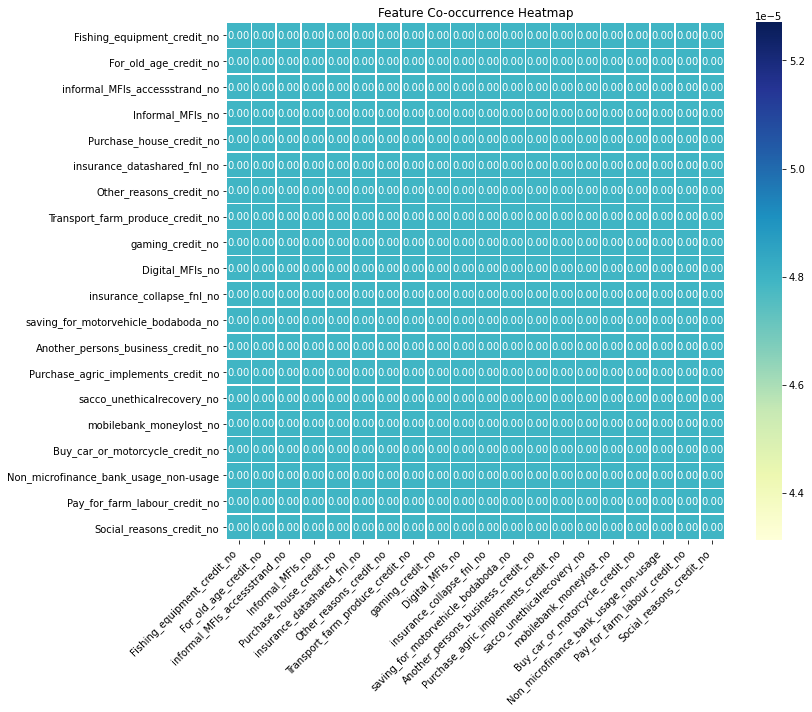

In [118]:
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_filtered, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Feature Co-occurrence Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()